In [0]:
csv = "https://raw.githubusercontent.com/andybbruno/DataMining/master/kids_train_cleaned.csv?token=AI2AUE57WCSSJEDHVD3Y6SC6AXC7Q"

In [0]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go




from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [0]:
df = pd.read_csv(csv)
df.drop(df.columns[0], axis=1, inplace=True)

In [0]:
df_clus = df[['AAAP', 'AACP', 'ARAP', 'ARCP', 'CAAP', 'CACP', 
             'CRAP', 'CRCP', 'VehBCost', 'WarrantyCost', 'VehOdo', 'VehYear', 'PCA1', 'PCA2']]
df_clus = df_clus[0:20000]

In [0]:
df_clus.corr()

,AAAP,AACP,ARAP,ARCP,CAAP,CACP,CRAP,CRCP,VehBCost,WarrantyCost,VehOdo,VehYear,PCA1,PCA2
AAAP,1.000000,0.989878,0.903182,0.903162,0.955589,0.949137,0.886317,0.884952,0.814996,-0.059589,-0.027343,0.599974,0.959632,0.222926
AACP,0.989878,1.000000,0.893702,0.910427,0.943685,0.951744,0.876935,0.887472,0.811896,-0.029827,0.015330,0.553751,0.957867,0.223021
ARAP,0.903182,0.893702,1.000000,0.989452,0.866905,0.862759,0.934822,0.926125,0.776201,-0.060880,0.022826,0.604416,0.965293,-0.191259
ARCP,0.903162,0.910427,0.989452,1.000000,0.864831,0.872291,0.927316,0.929899,0.780806,-0.033756,0.056427,0.564615,0.967742,-0.173774
CAAP,0.955589,0.943685,0.866905,0.864831,1.000000,0.990008,0.910105,0.907197,0.788281,-0.061284,-0.039652,0.598554,0.954432,0.271486
CACP,0.949137,0.951744,0.862759,0.872291,0.990008,1.000000,0.902216,0.915911,0.786274,-0.033103,0.001273,0.557502,0.955854,0.271375
CRAP,0.886317,0.876935,0.934822,0.927316,0.910105,0.902216,1.000000,0.988981,0.771579,-0.060717,0.003729,0.609869,0.970183,-0.105292
CRCP,0.884952,0.887472,0.926125,0.929899,0.907197,0.915911,0.988981,1.000000,0.773884,-0.033172,0.036846,0.571162,0.971837,-0.086056
VehBCost,0.814996,0.811896,0.776201,0.780806,0.788281,0.786274,0.771579,0.773884,1.000000,-0.039219,-0.075337,0.344432,0.814500,0.088770
WarrantyCost,-0.059589,-0.029827,-0.060880,-0.033756,-0.061284,-0.033103,-0.060717,-0.033172,-0.039219,1.000000,0.402873,-0.274464,-0.047319,0.003959


In [0]:
df_1 = df_clus[['AAAP', 'VehOdo', 'VehBCost']]
df_2 = df_clus[['WarrantyCost', 'VehOdo', 'VehBCost']]
df_3 = df_clus[['AAAP', 'VehOdo', 'WarrantyCost']]
df_4 = df_clus[['AAAP', 'VehBCost', 'VehYear']]

In [0]:
from sklearn.cluster import DBSCAN

In [0]:
to_db_scan = [df_1, df_2, df_3, df_4]
min_samp = []
epsilon = []
scaled_df = []
scaler = StandardScaler()

for i in range(5, 10):
  min_samp.append(math.pow(2, i))
p = 0.1
for i in range(0, 70):
  epsilon.append(p)
  p+=0.01

for e in to_db_scan:
  scaled_df.append(scaler.fit_transform(e.values))

In [0]:
plot_df_idx = 1
plot_eps = 0.45
plot_mp = 256
to_plot = to_db_scan[plot_df_idx]
columns = []
for c in to_plot.columns:
  columns.append(c)
x = columns[0]
y = columns[1]
z = columns[2]

res = DBSCAN(eps=plot_eps, min_samples=plot_mp).fit(scaled_df[plot_df_idx])
print(np.unique(res.labels_, return_counts=True))

(array([-1,  0]), array([ 4378, 15622]))


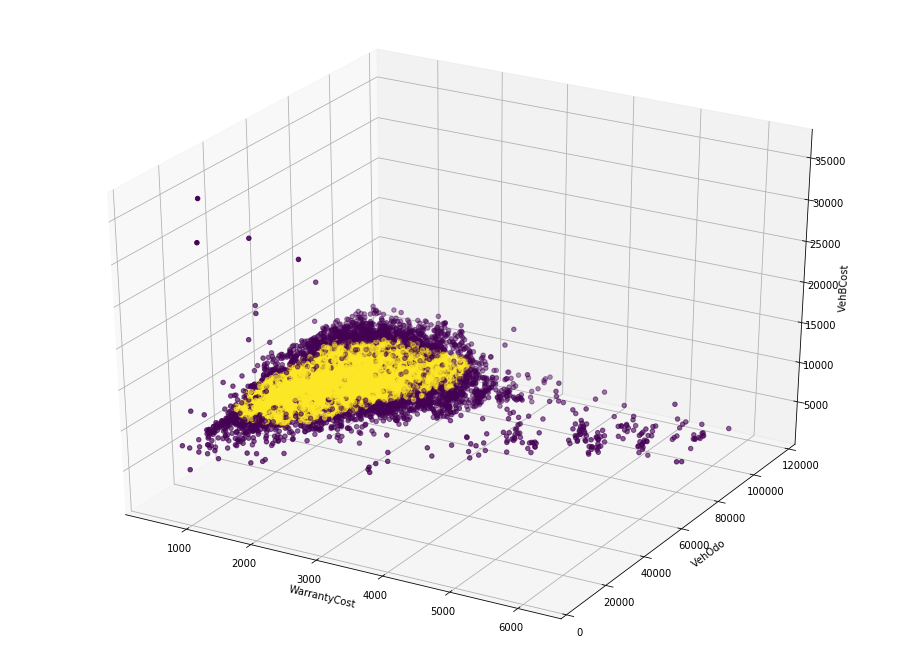

In [0]:
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(to_plot[x],
           to_plot[y],
           to_plot[z],
           c=res.labels_, marker='o')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

In [0]:
fig = go.Figure(data=[go.Scatter3d(
    x=to_plot[x],
    y=to_plot[y],
    z=to_plot[z],
    mode='markers',
    marker=dict(
        size=2,
        color=res.labels_,                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                 scene = dict(
                     xaxis_title= x,
                     yaxis_title= y,
                     zaxis_title= z)
                 )
fig.show()

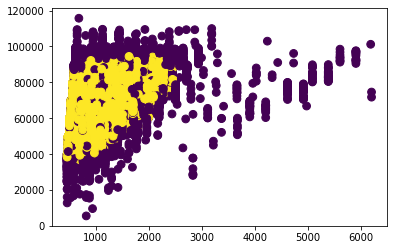

In [0]:
plt.scatter(to_plot['WarrantyCost'], to_plot['VehOdo'], 
            c=res.labels_, s=60)

In [0]:
results = {}

appl = [scaled_df[0], scaled_df[1]]

for i, e in enumerate(appl):
  results[str(i)] = []

for i, df in enumerate(appl):
  for j, eps in enumerate(epsilon):
    for ms in min_samp:
      results[str(i)].append({
        'res': DBSCAN(eps=eps, min_samples=ms).fit(df), 
        'ms': ms,
        'eps': eps
      })
      print("end ", eps, " at iteration ", j)

end  0.1  at iteration  0
end  0.1  at iteration  0
end  0.1  at iteration  0
end  0.1  at iteration  0
end  0.1  at iteration  0
end  0.11  at iteration  1
end  0.11  at iteration  1
end  0.11  at iteration  1
end  0.11  at iteration  1
end  0.11  at iteration  1
end  0.12  at iteration  2
end  0.12  at iteration  2
end  0.12  at iteration  2
end  0.12  at iteration  2
end  0.12  at iteration  2
end  0.13  at iteration  3
end  0.13  at iteration  3
end  0.13  at iteration  3
end  0.13  at iteration  3
end  0.13  at iteration  3
end  0.14  at iteration  4
end  0.14  at iteration  4
end  0.14  at iteration  4
end  0.14  at iteration  4
end  0.14  at iteration  4
end  0.15000000000000002  at iteration  5
end  0.15000000000000002  at iteration  5
end  0.15000000000000002  at iteration  5
end  0.15000000000000002  at iteration  5
end  0.15000000000000002  at iteration  5
end  0.16000000000000003  at iteration  6
end  0.16000000000000003  at iteration  6
end  0.16000000000000003  at iterati

In [0]:
for i, df in enumerate(appl):
  print("data frame ", str(i), ":")
  for e in results[str(i)]:
    print(np.unique(e['res'].labels_, return_counts=True), " for epsilon = " , e['eps'], " and min_p = ", e['ms'])
  print("========================================")

data frame  0 :
(array([-1,  0,  1,  2]), array([19796,    59,   109,    36]))  for epsilon =  0.1  and min_p =  32.0
(array([-1]), array([20000]))  for epsilon =  0.1  and min_p =  64.0
(array([-1]), array([20000]))  for epsilon =  0.1  and min_p =  128.0
(array([-1]), array([20000]))  for epsilon =  0.1  and min_p =  256.0
(array([-1]), array([20000]))  for epsilon =  0.1  and min_p =  512.0
(array([-1,  0,  1,  2]), array([19730,    81,   128,    61]))  for epsilon =  0.11  and min_p =  32.0
(array([-1]), array([20000]))  for epsilon =  0.11  and min_p =  64.0
(array([-1]), array([20000]))  for epsilon =  0.11  and min_p =  128.0
(array([-1]), array([20000]))  for epsilon =  0.11  and min_p =  256.0
(array([-1]), array([20000]))  for epsilon =  0.11  and min_p =  512.0
(array([-1,  0,  1,  2,  3]), array([19626,   126,   147,    67,    34]))  for epsilon =  0.12  and min_p =  32.0
(array([-1,  0]), array([19929,    71]))  for epsilon =  0.12  and min_p =  64.0
(array([-1]), array([2

In [0]:
filtered = []

for i, df in enumerate(appl):
  for idx, e in enumerate(results[str(i)]):
    labels, count = np.unique(e['res'].labels_, return_counts=True)
    if len(count) > 2: # len 0 => solo noise points, len => un solo cluster e noise points
      good_cluster_count = 0
      for punt, s in enumerate(labels):
        if s != -1 and count[punt] > 50:
          good_cluster_count += 1
      if good_cluster_count > 1:
        filtered.append({
            'df': i,
            'eps': e['eps'], 
            'min_samp': e['ms'],
            'labels': labels,
            'count': count, 
            'index': idx
        })

print("========================================")
print("Found ", len(filtered), " potentially good clustering results")
print("========================================")
for e in filtered:
  print(e['df'], "-> (<eps, min_samp> = <", round(e['eps'], 2), ",", e['min_samp'], ">) -> ", len(e['count']))

Found  107  potentially good clustering results
0 -> (<eps, min_samp> = < 0.1 , 32.0 >) ->  4
0 -> (<eps, min_samp> = < 0.11 , 32.0 >) ->  4
0 -> (<eps, min_samp> = < 0.12 , 32.0 >) ->  5
0 -> (<eps, min_samp> = < 0.13 , 32.0 >) ->  7
0 -> (<eps, min_samp> = < 0.14 , 32.0 >) ->  22
0 -> (<eps, min_samp> = < 0.14 , 64.0 >) ->  3
0 -> (<eps, min_samp> = < 0.15 , 32.0 >) ->  17
0 -> (<eps, min_samp> = < 0.15 , 64.0 >) ->  3
0 -> (<eps, min_samp> = < 0.16 , 32.0 >) ->  12
0 -> (<eps, min_samp> = < 0.16 , 64.0 >) ->  3
0 -> (<eps, min_samp> = < 0.17 , 64.0 >) ->  3
0 -> (<eps, min_samp> = < 0.18 , 64.0 >) ->  7
0 -> (<eps, min_samp> = < 0.19 , 64.0 >) ->  8
0 -> (<eps, min_samp> = < 0.2 , 64.0 >) ->  7
0 -> (<eps, min_samp> = < 0.21 , 64.0 >) ->  3
0 -> (<eps, min_samp> = < 0.22 , 128.0 >) ->  3
0 -> (<eps, min_samp> = < 0.23 , 128.0 >) ->  4
0 -> (<eps, min_samp> = < 0.24 , 128.0 >) ->  5
0 -> (<eps, min_samp> = < 0.25 , 32.0 >) ->  4
0 -> (<eps, min_samp> = < 0.25 , 128.0 >) ->  4
0 -> (<

Best clusters, data frame = [['AAAP', 'VehOdo', 'VehBCost']]:
- mp = 32 -> eps = 0.15, 0.16
- mp = 64 -> eps = 0.20
- mp = 128 -> eps = 0.25
- mp = 256 -> eps = 0.33, 0.34
- mp = 512 -> eps = 0.43

Best clusters, data frame = [['WarrantyCost', 'VehOdo', 'VehBCost']]:
- mp = 32 -> eps = 0.17
- mp = 64 -> eps = 0.22
- mp = 128 -> eps = 0.29
- mp = 256 -> eps = 0.38
- mp = 512 -> eps = 0.48


**Knee Method**

In [0]:
from scipy.spatial.distance import pdist, squareform
from itertools import combinations

In [0]:
def square_to_condensed(i, j, n):
    assert i != j, "no diagonal elements in condensed matrix"
    if i < j:
        i, j = j, i
    return n*j - j*(j+1)/2 + i - 1 - j

In [0]:
# SQUAREFORM
to_knee_square = []

for df_i, df in enumerate(to_knee_square):
  dist = []
  dist = squareform(pdist(df, 'euclidean'))
  kth_distances = []
  for d in dist:
    index_kth_distance = np.argsort(d)[5]
    kth_distances.append(d[index_kth_distance])
  plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
  plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
  plt.xlabel('sorted distances', fontsize=18)
  plt.tick_params(axis='both', which='major', labelsize=22)
  plt.show()



In [0]:
to_knee = []
# to_knee = appl

for df_i, df in enumerate(to_knee):
  dist = []
  dist = (pdist(df, metric='euclidean'))  #distance vector (condensed matrix)
  kth_distances = []
  n = len(df_1)
  for i in range (0, n):
    d = []
    for j in range (0, n):
      if i != j:
        idx = round(square_to_condensed(i, j, n))
        d.append(dist[idx])
    index_kth_distance = np.argsort(d)[5]
    kth_distances.append(d[index_kth_distance])
    if i % 1000 == 0:
      print("data frame ", df_i, ": ", i, " out of ", n)

  plt.clf()
  xLab = "Points sorted according to distance from " + str(
      5) + "th nearest neighbour"
  yLab = str(5) + "th nearest neighbour distance"
  plt.xlabel(xLab)
  plt.ylabel(yLab)
  plt.yticks(np.arange(0, 2, 0.1))
  ax = plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
  plt.grid(color='black', linestyle='-', linewidth=1)
  plt.show()

In [0]:
silu = {}
to_silu = []
#to_silu = appl

for idx, e in enumerate(to_silu):
  silu[str(idx)] = []

for idx, e in enumerate(to_silu):
  for i, p in enumerate(min_samp):
    #silu[str(idx)].append(silhouette_score(e, results[str(idx)][i].labels_, metric = 'euclidean'))
    silu[str(idx)].append(silhouette_score(e, results[str(idx)][i].labels_))
  print("end data frame ", idx)